In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv("../../Files/gene_expression.csv")


In [3]:
df.head()


,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


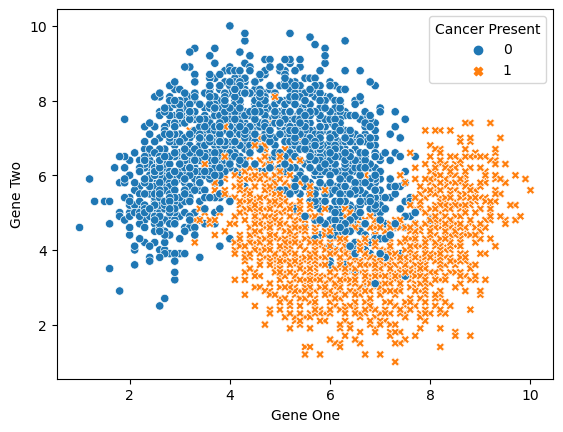

In [4]:
sns.scatterplot(data=df, x="Gene One", y="Gene Two",
                hue="Cancer Present",  style="Cancer Present")

plt.savefig("scatterplot for cancer.png")
plt.show()


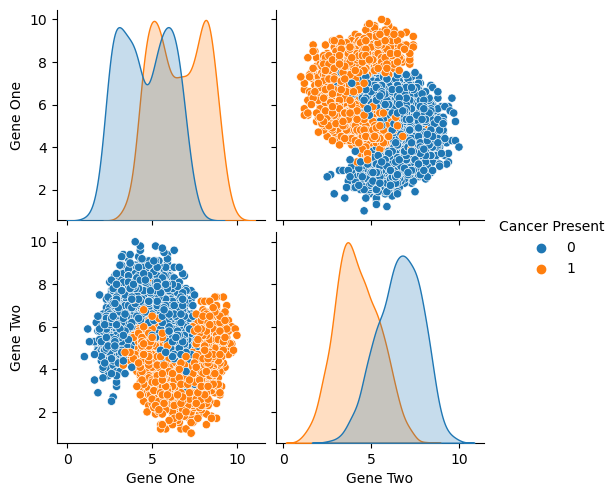

In [5]:
sns.pairplot(data=df, hue="Cancer Present")
plt.savefig("pairplot.png")


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
from sklearn.preprocessing import StandardScaler


In [8]:
X = df.drop("Cancer Present", axis=1)


In [9]:
y = df["Cancer Present"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)


In [11]:
scaler = StandardScaler()


In [12]:
scaled_X_train = scaler.fit_transform(X_train)


In [13]:
scaled_X_test = scaler.transform(X_test)


In [14]:
from sklearn.neighbors import KNeighborsClassifier


In [15]:
model = KNeighborsClassifier(n_neighbors=1)


In [16]:
model.fit(scaled_X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [17]:
y_prediction = model.predict(scaled_X_test)


c:\Users\habib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:
from sklearn.metrics  import confusion_matrix, classification_report


In [19]:
confusion_matrix(y_test, y_prediction)


array([[382,  41],
       [ 34, 443]], dtype=int64)

In [20]:
print(classification_report(y_test, y_prediction))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [21]:
from sklearn.metrics import plot_confusion_matrix


c:\Users\habib\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\habib\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


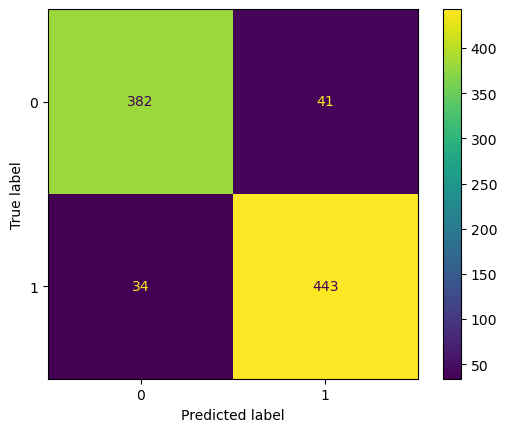

In [22]:
plot_confusion_matrix(model, scaled_X_test, y_test)

plt.savefig("confusion_matrix.png")
